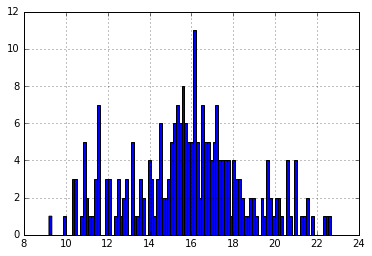

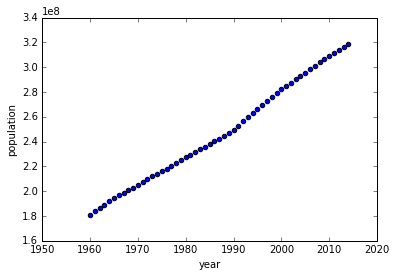

In [48]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

pop = pd.read_csv('../data/population.csv', skiprows=4)
pop.rename(columns=lambda c: c.lower().replace(' ', '_'), inplace=True)
pop.drop(['indicator_name', 'indicator_code','unnamed:_60', '2015'], axis=1, inplace=True)
pop = pd.melt(pop, id_vars=['country_name', 'country_code'], var_name='year', value_name='population')
pop.year = pd.to_numeric(pop.year)
pop['log_pop'] = np.log(pop.population)
pop.head()
pop[pop.year==2012].log_pop.hist(bins=100)
pop[pop.country_name == 'United States'].plot(kind='scatter', x='year', y='population')

0.010354515316421731

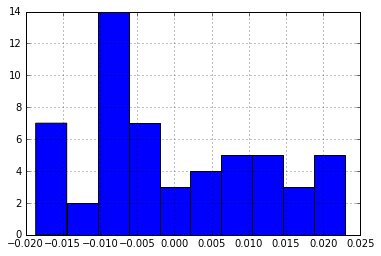

In [82]:
usa = pop[pop.country_name == 'United States']
# usa.plot(kind='scatter', x='year', y='population')

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(usa[['year']], usa['population'])
model.coef_
# model.intercept_
model.predict(2016)
model.predict([[2017], [2015], [2016]])
pred_pop = model.predict(usa[['year']])
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mean_absolute_error(pred_pop, usa.population)
np.sqrt(mean_squared_error(pred_pop, usa.population))

# plt.scatter(usa.year, (pred_pop -usa.population)/usa.population )
error = pd.Series((pred_pop -usa.population)/usa.population)
error.hist()
error.abs().mean()



0.19277159807165747

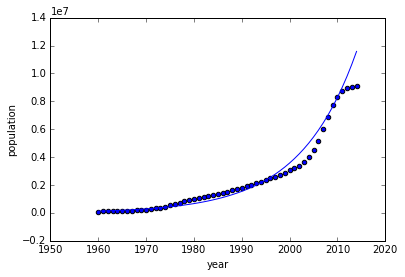

In [106]:
uae = pop[pop.country_code=='ARE']
uae.plot(kind='scatter', x='year', y='population')
from sklearn.linear_model import LinearRegression

model_uae = LinearRegression()
model_uae.fit(uae[['year']], uae['log_pop'])
model_uae.coef_
# model.intercept_
# model.predict(2016)
# model.predict([[2017], [2015], [2016]])
pred_pop = model_uae.predict(uae[['year']])
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# mean_absolute_error(pred_pop, uae.population)
# np.sqrt(mean_squared_error(pred_pop, uae.population))

# plt.scatter(uae.year, (pred_pop -uae.population)/uae.population )

plt.plot(uae.year, np.exp(pred_pop) )
error = pd.Series((pred_pop -uae.log_pop))
# error.hist()
error.abs().mean()


In [103]:
# plt.plot(uae.year, np.exp(pred_pop) )
np.exp()

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf])

In [21]:
pop

,country_name,country_code,year,pop
0,Aruba,ABW,1960,5.420800e+04
1,Andorra,AND,1960,1.341400e+04
2,Afghanistan,AFG,1960,8.994793e+06
3,Angola,AGO,1960,5.270844e+06
4,Albania,ALB,1960,1.608800e+06
5,Arab World,ARB,1960,9.249590e+07
6,United Arab Emirates,ARE,1960,9.261200e+04
7,Argentina,ARG,1960,2.061908e+07
8,Armenia,ARM,1960,1.867396e+06
9,American Samoa,ASM,1960,2.001200e+04


In [44]:
pop.country_name.value_counts().so

Belize                                          55
Sub-Saharan Africa (developing only)            55
Romania                                         55
Lebanon                                         55
Belgium                                         55
Cuba                                            55
Sweden                                          55
Liechtenstein                                   55
Fiji                                            55
St. Vincent and the Grenadines                  55
Angola                                          55
Botswana                                        55
Saudi Arabia                                    55
Chile                                           55
Australia                                       55
Pakistan                                        55
Comoros                                         55
American Samoa                                  55
Russian Federation                              55
Latin America & Caribbean (deve

ERROR! Session/line number was not unique in database. History logging moved to new session 95
